## 1. Importing necessary libraries

In [282]:
import pandas as pd 
import numpy as np
import seaborn as sns # for charts
import matplotlib as mpl # plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import *
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score

## 2. Reading Data

In [283]:
net_train=pd.read_csv('Train.csv')
net_test=pd.read_csv('Test.csv')
# net_test = net_test.sample(frac=1).reset_index(drop=True)
# net_train = net_train.sample(frac=1).reset_index(drop=True)

In [284]:
net_train.head(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1/1/2018 0:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,1/1/2018 0:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,1/1/2018 0:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,1/1/2018 1:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,1/1/2018 1:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,1/1/2018 1:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,1/1/2018 1:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,1/1/2018 2:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,1/1/2018 2:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,1/1/2018 2:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [285]:
net_train.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [286]:
net_test.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [287]:
net_train.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,27999.000000,27999.000000,27880.000000,27999.000000,27999.000000,27923.000000,27999.000000
mean,27.888785,13.230912,3.881065,0.011790,79.940163,84.479796,42718.611379
std,33.919271,16.469935,7.495718,0.016354,19.397474,30.422037,24933.404759
min,2.450000,0.000000,0.000000,0.000000,36.940000,12.500000,0.000000
25%,3.130000,2.740000,0.000000,0.000000,61.640000,99.810000,20700.000000
50%,4.570000,5.040000,0.000000,0.000000,87.990000,100.000000,42300.000000
75%,51.190000,22.820000,2.230000,0.020000,99.080000,100.000000,63900.000000
max,153.140000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [288]:
net_train.drop_duplicates(inplace=True)
net_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 0 to 27998
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  27999 non-null  object 
 1   Usage_kWh                             27999 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  27999 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  27880 non-null  float64
 4   CO2(tCO2)                             27999 non-null  float64
 5   Lagging_Current_Power_Factor          27999 non-null  float64
 6   Leading_Current_Power_Factor          27923 non-null  float64
 7   NSM                                   27999 non-null  int64  
 8   WeekStatus                            26225 non-null  object 
 9   Day_of_week                           26225 non-null  object 
 10  Load_Type                             27999 non-null  object 
dtypes: float64(6), 

In [289]:
y_train=net_train["Usage_kWh"]
x_train=net_train.drop('Usage_kWh', axis = 1, inplace = False)
y_test=net_test["Usage_kWh"]
x_test=net_test.drop('Usage_kWh', axis = 1, inplace = False)

**Data-time :**

- `date`,`time`; 

**Categorical Data:**
- `Day_of_week`,  `WeekStatus`; *nominal*
- `Load_Type`; *ordinal*

**Numerical Data:**
- `Lagging_Current_Reactive.Power_kVarh`, `Leading_Current_Reactive_Power_kVarh`, `Lagging_Current_Power_Factor`, `Leading_Current_Power_Factor`, `CO2(tCO2)`,`NSM`; *continuous*

**Target Variable**
- `Usage_kWh` *Numerical*-*continuous*

We also have some missing values to deal with in 4 coulnms { WeekStatus , Day_of_week , Leading_Current_Reactive_Power_kVarh , Leading_Current_Power_Factor }:

In [290]:
categorical_cols = [x for x in x_train.columns if( x_train[x].dtype =="object")]
numerical_cols = [x for x in x_train.columns if x not in categorical_cols]


In [291]:
x_train.head(10)

,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1/1/2018 0:15,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,1/1/2018 0:30,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,1/1/2018 0:45,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,1/1/2018 1:00,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,1/1/2018 1:15,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,1/1/2018 1:30,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,1/1/2018 1:45,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,1/1/2018 2:00,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,1/1/2018 2:15,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,1/1/2018 2:30,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


## 3. Preprocessing on date  columns and filling its nulls

In [292]:
x_train['date'] = pd.to_datetime(x_train['date'],dayfirst=True)
# x_train['time'] = x_train['date'].dt.time
x_train['hour']= x_train['date'].dt.hour
x_train['minutes']= x_train['date'].dt.minute

x_train['date'] = pd.to_datetime(x_train['date'].dt.date)


In [293]:
x_test['date'] = pd.to_datetime(x_test['date'],dayfirst=True)
# x_test['time'] = x_test['date'].dt.time
x_test['hour']= x_test['date'].dt.hour
x_test['minutes']= x_test['date'].dt.minute
x_test['date'] = pd.to_datetime(x_test['date'].dt.date)


 The date column consists of time and date so we  attached it in two columns one to date and the other for a time,    We  also changed the date column data type from object to date-time.

In [294]:
x_train.head(10)

,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hour,minutes
0,2018-01-01,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,0,15
1,2018-01-01,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,0,30
2,2018-01-01,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,0,45
3,2018-01-01,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,0
4,2018-01-01,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,15
5,2018-01-01,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load,1,30
6,2018-01-01,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load,1,45
7,2018-01-01,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load,2,0
8,2018-01-01,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load,2,15
9,2018-01-01,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load,2,30


In [295]:
x_train['weekday']=x_train['date'].dt.weekday
x_train['day']=x_train['date'].dt.day_name()
x_test['weekday']=x_test['date'].dt.weekday
x_test['day']=x_test['date'].dt.day_name()

From the date colunm , we can conclude the column of new days_of_week and week_status colunm without null values and new colunm contains the month and for time coulnm we can conclude new colunm contain the hoor , so we can drop date colunm and old days_of_week colunm  and time colunm.

In [296]:
x_train.head(10)

,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hour,minutes,weekday,day
0,2018-01-01,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,0,15,0,Monday
1,2018-01-01,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,0,30,0,Monday
2,2018-01-01,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,0,45,0,Monday
3,2018-01-01,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,0,0,Monday
4,2018-01-01,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,15,0,Monday
5,2018-01-01,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load,1,30,0,Monday
6,2018-01-01,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load,1,45,0,Monday
7,2018-01-01,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load,2,0,0,Monday
8,2018-01-01,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load,2,15,0,Monday
9,2018-01-01,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load,2,30,0,Monday


In [297]:
mask = x_train.iloc[:, 7].isnull()
weekend_mask = (x_train.iloc[:, 11] == 6) | (x_train.iloc[:, 11] == 5)
x_train.loc[mask & weekend_mask, "WeekStatus"] = "Weekend"
x_train.loc[mask & ~weekend_mask, "WeekStatus"] = "Weekday"

In [298]:
mask = x_test.iloc[:, 7].isnull()
weekend_mask = (x_test.iloc[:, 11] == 6) | (x_test.iloc[:, 11] == 5)
x_test.loc[mask & weekend_mask, "WeekStatus"] = "Weekend"
x_test.loc[mask & ~weekend_mask, "WeekStatus"] = "Weekday"

we have filled the nulls in week_status colunm based on date coulnm 

In [299]:
x_train.head(10)

,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hour,minutes,weekday,day
0,2018-01-01,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,0,15,0,Monday
1,2018-01-01,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,0,30,0,Monday
2,2018-01-01,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,0,45,0,Monday
3,2018-01-01,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,0,0,Monday
4,2018-01-01,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,15,0,Monday
5,2018-01-01,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load,1,30,0,Monday
6,2018-01-01,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load,1,45,0,Monday
7,2018-01-01,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load,2,0,0,Monday
8,2018-01-01,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load,2,15,0,Monday
9,2018-01-01,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load,2,30,0,Monday


In [300]:
categorical_cols.remove('date')
categorical_cols.remove('Day_of_week')
x_train.isna().sum()

date                                       0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                                 0
Day_of_week                             1774
Load_Type                                  0
hour                                       0
minutes                                    0
weekday                                    0
day                                        0
dtype: int64

In [301]:
x_test.isna().sum()

date                                      0
Lagging_Current_Reactive.Power_kVarh      0
Leading_Current_Reactive_Power_kVarh      0
CO2(tCO2)                                 0
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
WeekStatus                                0
Day_of_week                             692
Load_Type                                 0
hour                                      0
minutes                                   0
weekday                                   0
day                                       0
dtype: int64

In [302]:
x_train.head(10000)

,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hour,minutes,weekday,day
0,2018-01-01,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,0,15,0,Monday
1,2018-01-01,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,0,30,0,Monday
2,2018-01-01,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,0,45,0,Monday
3,2018-01-01,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,0,0,Monday
4,2018-01-01,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,15,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-04-15,3.85,0.0,0.0,63.92,100.0,10800,Weekend,Sunday,Light_Load,3,0,6,Sunday
9996,2018-04-15,3.92,0.0,0.0,62.40,100.0,11700,Weekend,Sunday,Light_Load,3,15,6,Sunday
9997,2018-04-15,3.96,0.0,0.0,62.01,100.0,12600,Weekend,Sunday,Light_Load,3,30,6,Sunday
9998,2018-04-15,4.00,0.0,0.0,61.63,100.0,13500,Weekend,Sunday,Light_Load,3,45,6,Sunday


## 4.preprocess the Categorical data


In [303]:
for i in categorical_cols:
    print("-----"+i+"-----")
    print(x_train[i].value_counts(normalize=True))
    print("\n")


-----WeekStatus-----
Weekday    0.739419
Weekend    0.260581
Name: WeekStatus, dtype: float64


-----Load_Type-----
Light_Load      0.513018
Medium_Load     0.278010
Maximum_Load    0.208972
Name: Load_Type, dtype: float64




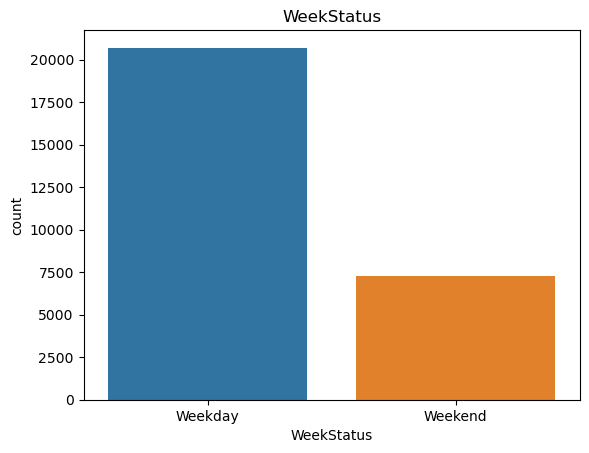

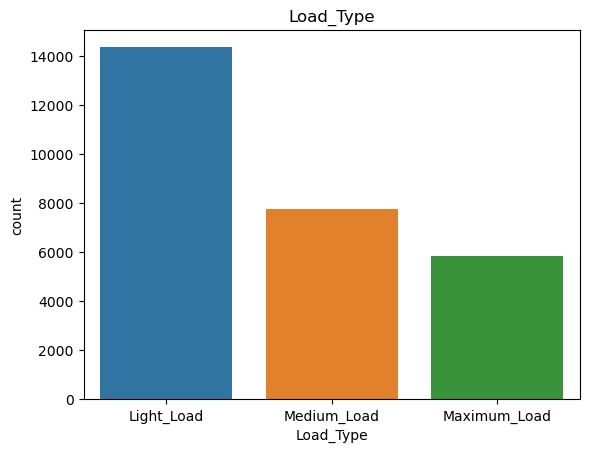

In [304]:
for i in categorical_cols:
    plt.title(i)
    sns.countplot(x = x_train[i])
    plt.show()


The data is unbalanced in load_type column and week status column

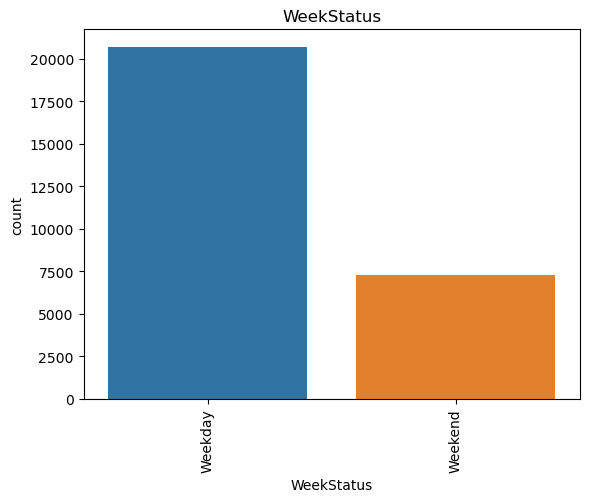

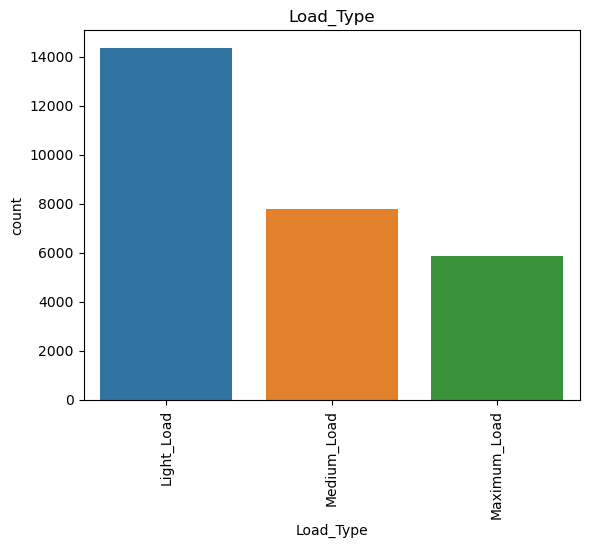

In [305]:
for i in categorical_cols:
    plt.title(i)
    sns.countplot(x = x_train[i])
    
    plt.xticks(rotation=90)
    plt.show()


ordinal

In [306]:
order_Load_Type=['Light_Load','Medium_Load','Maximum_Load']

In [307]:
Load_Type_label=OrdinalEncoder(categories=[order_Load_Type])
Load_Type_label.fit(x_train[["Load_Type"]])
x_train["Load_Type"]=pd.DataFrame(Load_Type_label.transform(x_train[["Load_Type"]]))
x_test["Load_Type"]=pd.DataFrame(Load_Type_label.transform(x_test[["Load_Type"]]))


nominal 

In [308]:
x_train["WeekStatus"]=pd.get_dummies(x_train["WeekStatus"],drop_first=True)
day_d=pd.get_dummies(x_train["day"],drop_first=True)
x_train=pd.concat([x_train,day_d],axis=1)

In [309]:
x_test["WeekStatus"]=pd.get_dummies(x_test["WeekStatus"],drop_first=True)
day=pd.get_dummies(x_test["day"],drop_first=True)
x_test=pd.concat([x_test,day],axis=1)

In [310]:
x_test.drop(['date', 'Day_of_week','day'], axis = 1, inplace = True) 
x_train.drop(['date', 'Day_of_week','day'], axis = 1, inplace = True) 


 ## 5.preprocess the numerical data


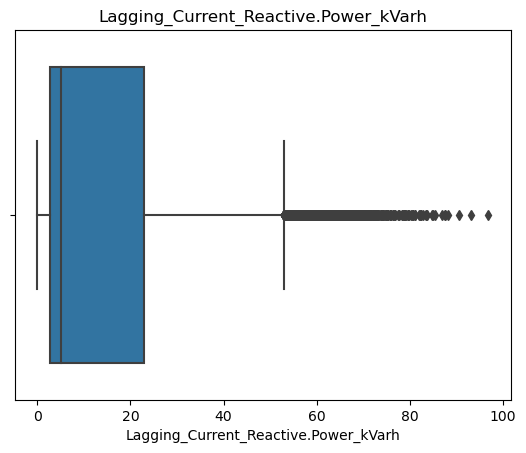

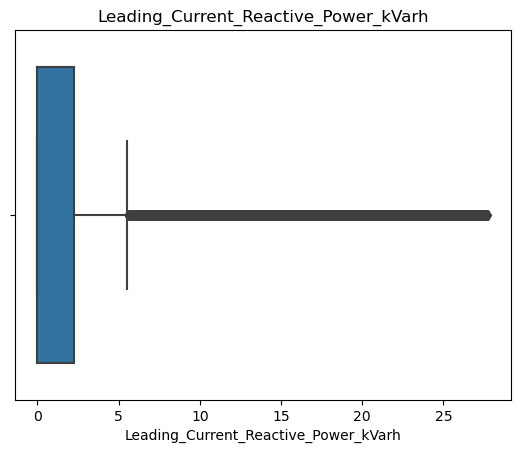

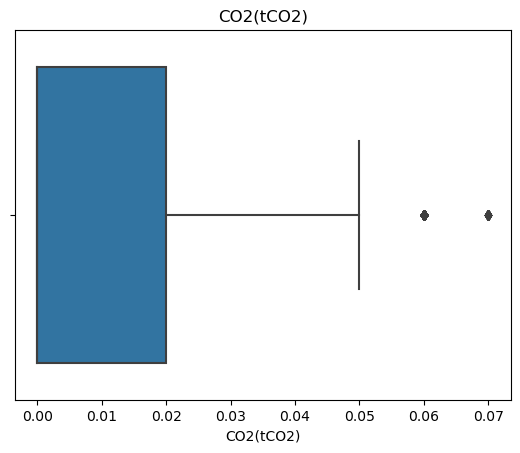

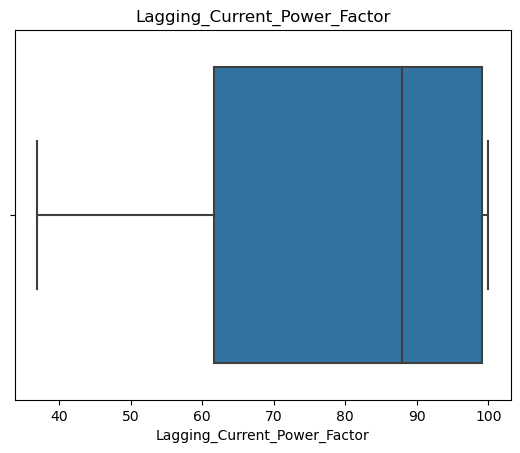

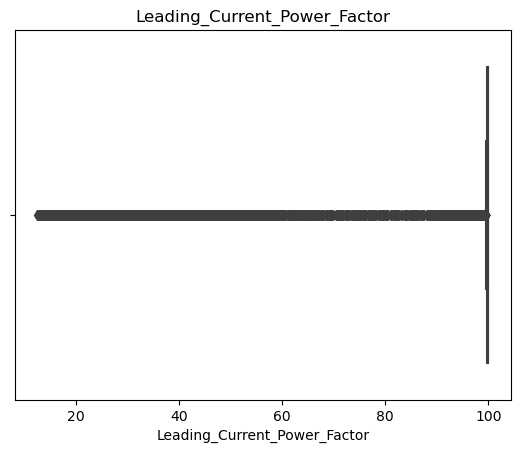

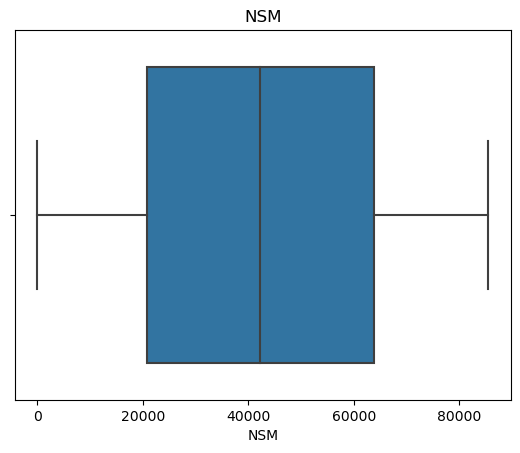

In [311]:
for i in numerical_cols:
    plt.title(i)
    sns.boxplot(x = x_train[i])
    plt.show()

 It seems that there are no outliers in the data

C:\Users\ehabe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


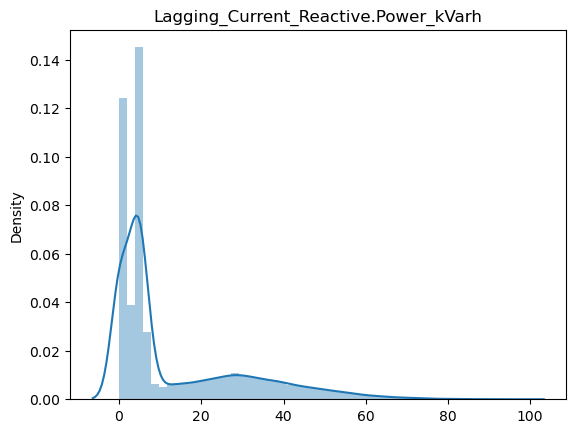

C:\Users\ehabe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


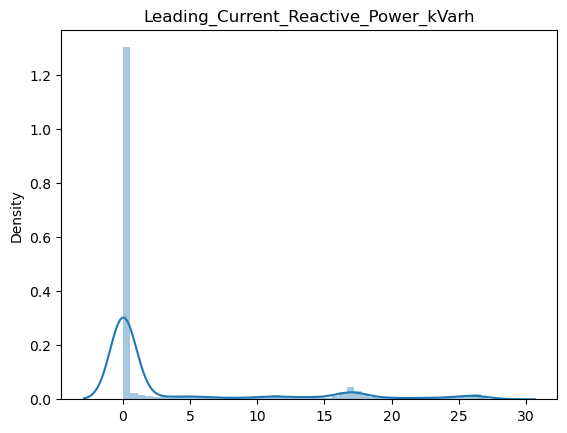

C:\Users\ehabe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


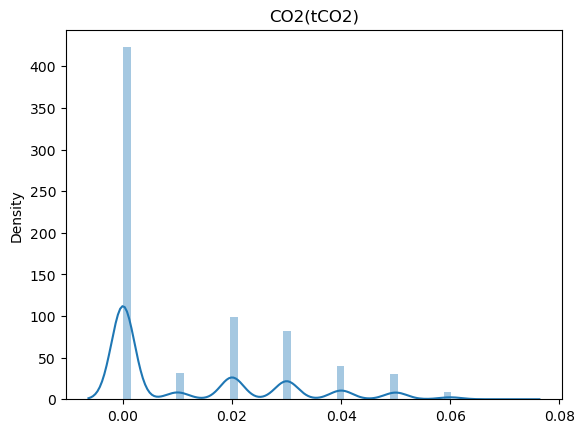

C:\Users\ehabe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


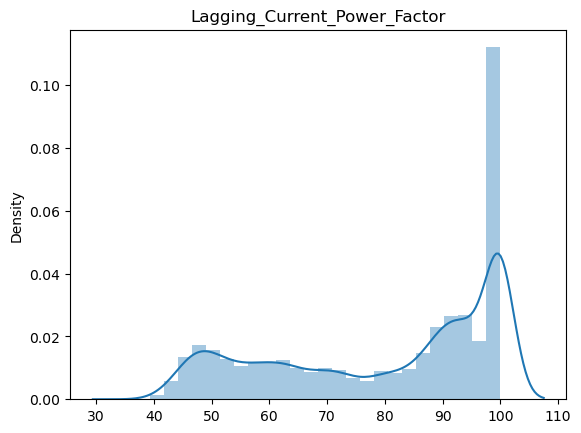

C:\Users\ehabe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


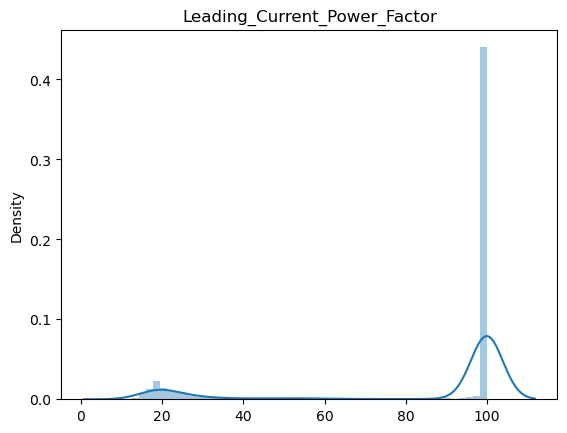

C:\Users\ehabe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


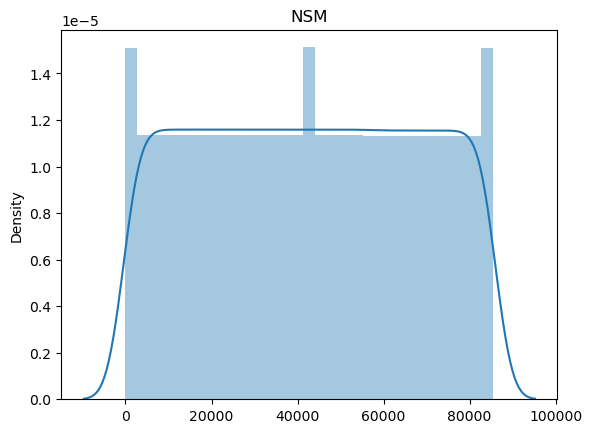

In [312]:
for i in numerical_cols:
    plt.title(i)
    sns.distplot(x = x_train[i])
    plt.show()
    # Distribution plot  



In [315]:
x_train['Leading_Current_Reactive_Power_kVarh'].fillna(x_train['Leading_Current_Reactive_Power_kVarh'].median(),inplace = True)
x_train['Leading_Current_Power_Factor'].fillna(x_train['Leading_Current_Power_Factor'].median(),inplace = True)

In [317]:
x_test.isna().sum()

Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Load_Type                               0
hour                                    0
minutes                                 0
weekday                                 0
Monday                                  0
Saturday                                0
Sunday                                  0
Thursday                                0
Tuesday                                 0
Wednesday                               0
dtype: int64

we have filled the nulls with the ,median because the data is not normaly ditrbuted although The median is a robust statistic that is not affected by extreme values or outliers in the data

In [265]:
def normalize(test_data,data, cols_to_normalize):
    for col in cols_to_normalize:
        max_val = data[col].max()
        min_val = data[col].min()
        data[col] = (data[col] - min_val) / (max_val - min_val)
        test_data[col] = (test_data[col] - min_val) / (max_val - min_val)



In [266]:
normalize(x_test,x_train,numerical_cols)

We have normalized the data using min max normalization to converge faster

## 5.Model Election


In [267]:
# Fit a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred_linear = linear_reg.predict(x_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)

In [268]:
# Fit a ridge regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)


In [269]:
# Fit a lasso regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

In [270]:
# Compare the mean squared errors to select the best model
if linear_mse < ridge_mse and linear_mse < lasso_mse:
    best_model = linear_reg
    print("Linear Regression has the lowest mean squared error.")
elif ridge_mse < lasso_mse:
    best_model = ridge_reg
    print("Ridge Regression has the lowest mean squared error.")
else:
    best_model = lasso_reg
    print("Lasso Regression has the lowest mean squared error.")

Linear Regression has the lowest mean squared error.


## 6.Plotting the Learning Curve and apply cross valdition



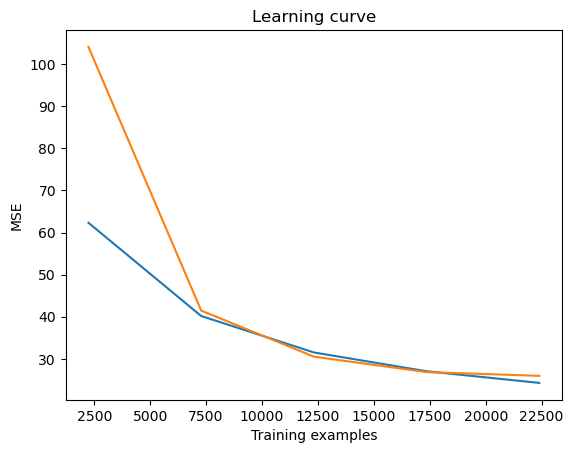

In [271]:
# Define the number of folds
n_folds = 5
# Define the cross-validation method
kf = KFold(n_splits=n_folds)
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(linear_reg, x_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.show()



In [279]:
param_grid = {'alpha': [0.01, 0.005, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
# Fit the model
grid_search.fit(x_train, y_train)
model = grid_search.best_estimator_
# Print the mean squared error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 12.589497982237486


In [273]:
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f"Accurcy: {r2}")

Accurcy: 0.987236073796235


In [280]:
# Calculate the R2 score
r2 = r2_score(y_test, y_pred_linear)
print(f"Accurcy: {r2}")

Accurcy: 0.9872643120760647
